# LIBRARY

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer, MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score

# LOAD DATA

In [2]:
game_df = pd.read_csv('https://raw.githubusercontent.com/dfin12/submission_kedua_machine_learning_trapan/refs/heads/main/steam.csv')

# EDA

Melihat tipe data dari setiap kolom

In [3]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27074 non-null  object 
 5   publisher         27061 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

Melihat statistika deskriptif dari fitur numerik yang ada

In [4]:
game_df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


Menampilkan 5 data teratas

In [5]:
game_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Melihat nilai kosong untuk setiap fitur

In [6]:
missing_values = game_df.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
columns_with_missing_values

,0
developer,1
publisher,14


Melihat adanya duplikasi pada data

In [7]:
duplicate_rows = game_df[game_df.duplicated()]
duplicate_rows

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price


Visualisasi top 5 genre

In [8]:
all_genres = [genre for sublist in game_df['genres'].dropna().apply(lambda x: x.split(';')) for genre in sublist]
genre_counts = Counter(all_genres)
top_5_genres = genre_counts.most_common(5)
genres, counts = zip(*top_5_genres)

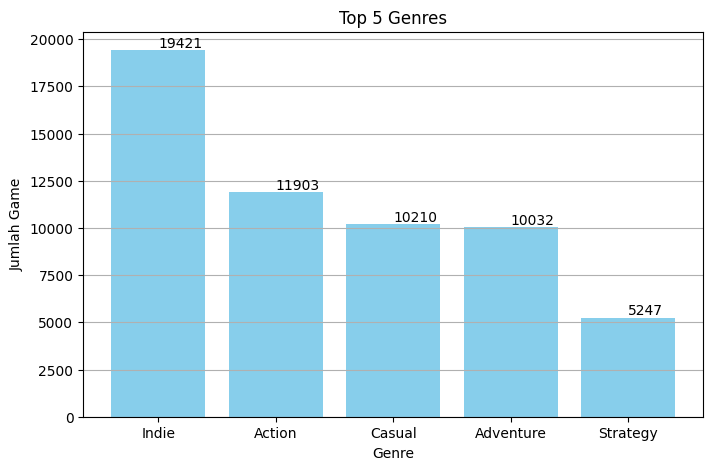

In [9]:
plt.figure(figsize=(8, 5))
bars = plt.bar(genres, counts, color='skyblue')
plt.title('Top 5 Genres')
plt.xlabel('Genre')
plt.ylabel('Jumlah Game')
plt.grid(axis='y')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') # va: vertical alignment

plt.show()

# PREPROCESSING DATA

Pemilihan fitur dan penanganan missing values

In [10]:
game_df_selected = game_df[['name', 'genres', 'steamspy_tags', 'price', 'positive_ratings', 'negative_ratings']].copy()
game_df_selected.dropna(inplace=True)

Transformasi data

In [11]:
for col in ['genres', 'steamspy_tags']:
    game_df_selected[col] = game_df_selected[col].apply(lambda x: x.split(';') if isinstance(x, str) else [])

Membuat kolom rating terintegrasi dan menghapus fitur positive_ratings dan negative_ratings

In [12]:
game_df_selected['ratings'] = game_df_selected['positive_ratings'] / (game_df_selected['positive_ratings'] + game_df_selected['negative_ratings'] + 1e-5)
game_df_selected.drop(['positive_ratings', 'negative_ratings'], axis=1, inplace=True)

Encoding fitur genres dan tag menggunakan miltilabel

In [13]:
mlb_genres = MultiLabelBinarizer()
mlb_tags = MultiLabelBinarizer()

genres_encoded = mlb_genres.fit_transform(game_df_selected['genres'])
tags_encoded = mlb_tags.fit_transform(game_df_selected['steamspy_tags'])

In [14]:
features = np.hstack((genres_encoded, tags_encoded))

feature scaling price dan rating

In [15]:
numerics = game_df_selected[['price', 'ratings']].values
scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(numerics)

Final feature matriks

In [16]:
X = np.hstack((features, numeric_scaled))

# MODELING

Input dimensi

In [17]:
input_dim = X.shape[1]
encoding_dim = 32

Membangun model Neural Network

In [18]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
embedding = Dense(encoding_dim, activation='relu', name='embedding')(encoded)
decoded = Dense(64, activation='relu')(embedding)
decoded = Dense(128, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

In [19]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)
encoder = Model(inputs=input_layer, outputs=embedding)

In [20]:
autoencoder.compile(optimizer='adam', loss='mse')
history = autoencoder.fit(X, X, epochs=20, batch_size=64, validation_split=0.2, callbacks=[EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0567 - val_loss: 0.0055
Epoch 2/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0056 - val_loss: 0.0046
Epoch 3/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0051 - val_loss: 0.0045
Epoch 4/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0050 - val_loss: 0.0044
Epoch 5/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 6/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 7/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 8/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 9/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 10/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0050 - val_loss: 0.0043
Epoch 11/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 12/20
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

# EVALUATION & RECOMENDATION

Visualisasi loss

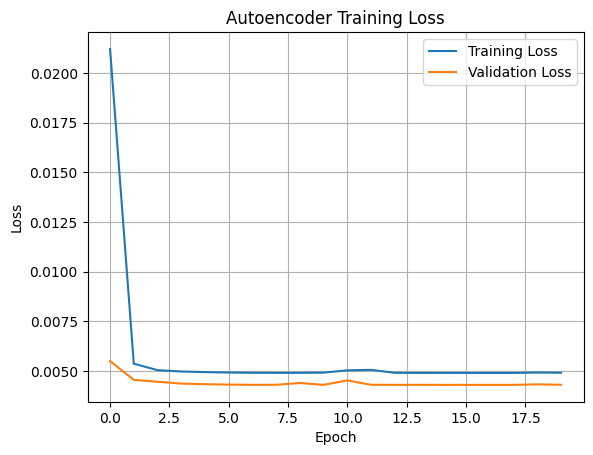

In [21]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

Ekstraksi embedding untuk seluruh game

In [22]:
game_embeddings = encoder.predict(X)

def recommend(game_name=None, genre=None, price_range=None, min_rating=None, top_k=20):
    filtered_indices = game_df_selected.index.tolist()

    if genre:
        filtered_indices = game_df_selected[game_df_selected['genres'].apply(lambda g: genre in g)].index.tolist()

    if price_range:
        low, high = price_range
        filtered_indices = [i for i in filtered_indices if low <= game_df_selected.loc[i, 'price'] <= high]

    if min_rating:
        filtered_indices = [i for i in filtered_indices if game_df_selected.loc[i, 'ratings'] >= min_rating]

    if game_name:
        if game_name not in game_df_selected['name'].values:
            return f"Game '{game_name}' tidak ditemukan."
        idx = game_df_selected[game_df_selected['name'] == game_name].index[0]
        query_vec = game_embeddings[idx].reshape(1, -1)
    else:
        if not filtered_indices:
            return "Tidak ada game yang cocok dengan kriteria."
        query_vec = game_embeddings[filtered_indices].mean(axis=0).reshape(1, -1)

    sim_scores = cosine_similarity(query_vec, game_embeddings)[0]
    top_indices = np.argsort(sim_scores)[::-1]

    top_filtered = [i for i in top_indices if i in filtered_indices][:top_k]
    return game_df_selected.iloc[top_filtered][['name', 'genres', 'price', 'ratings']]

847/847 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Berdasarkan nama

In [23]:
recommend(game_name="Counter-Strike")

,name,genres,price,ratings
0,Counter-Strike,[Action],7.19,0.973888
10,Counter-Strike: Source,[Action],7.19,0.956362
203,Call of Duty® 4: Modern Warfare®,[Action],19.99,0.913995
258,Call of Duty®: Modern Warfare® 2,[Action],19.99,0.913925
330,Unreal Tournament 3 Black,[Action],13.99,0.896731
219,BioShock Infinite,[Action],19.99,0.953823
7,Counter-Strike: Condition Zero,[Action],7.19,0.893871
12144,Outlaws + A Handful of Missions,[Action],4.79,0.931034
13,Half-Life 2: Deathmatch,[Action],3.99,0.884384
13832,Epic Snails,"[Action, Early Access]",0.00,0.938461


berdasarkan genre

In [24]:
recommend(genre="Action")

,name,genres,price,ratings
21648,Mushroom Heroes,"[Action, Adventure, Casual, Free to Play, Indie]",0.00,0.827068
21060,Aqua Lungers,"[Action, Adventure, Casual, Indie, Racing, Ear...",5.79,0.916666
21275,One Ping Only,"[Action, Adventure, Casual, Free to Play, Indie]",0.00,0.908108
25621,Abrakadaboom,"[Action, Adventure, Casual, Indie, Early Access]",15.40,0.999990
20302,Animosity,"[Violent, Action, Adventure, Casual, Indie, Ea...",7.19,0.999998
22057,King Rabbit,"[Action, Adventure, Casual, Free to Play, Indi...",0.00,0.913043
25136,Dandy & Randy,"[Action, Adventure, Casual, Indie, Early Access]",6.19,0.999998
23482,ShyChess,"[Sexual Content, Nudity, Violent, Gore, Action...",1.69,0.827586
15033,Echo Nine,"[Action, Adventure, Casual, Indie, Early Access]",3.99,0.999990
9713,Acid Flip,"[Action, Adventure, Casual, Indie, Early Access]",3.99,0.999990


berdasarkan rating dan harga

In [25]:
recommend(price_range=(0, 10), min_rating=0.9)

,name,genres,price,ratings
17151,Octopus Bar,"[Action, Adventure, Casual, Free to Play, Indi...",0.00,0.947368
3320,Roundabout,"[Action, Adventure, Casual, Indie]",6.99,0.932018
8045,Ara Fell,"[Action, Adventure, Casual, Indie, RPG]",6.99,0.954145
4053,SanctuaryRPG: Black Edition,"[Action, Adventure, Casual, Indie, RPG, Strategy]",5.79,0.926941
3362,Unturned,"[Action, Adventure, Casual, Free to Play, Indie]",0.00,0.902850
23430,Music Racer,"[Action, Casual, Indie, Racing]",1.69,0.922638
19637,R Academy,"[Adventure, Casual, Indie]",4.79,0.999995
14925,Marie's Room,"[Adventure, Casual, Free to Play, Indie]",0.00,0.948098
24590,Food Drive: Race against Hunger,"[Action, Casual, Free to Play, Indie, Early Ac...",0.00,0.922078
7886,We Know the Devil,"[Adventure, Casual, Indie]",5.59,0.918317


Precision@K Evaluation

In [26]:
def precision_at_k(game_index, top_k=20):
    query_vec = game_embeddings[game_index].reshape(1, -1)
    sim_scores = cosine_similarity(query_vec, game_embeddings)[0]
    top_indices = np.argsort(sim_scores)[::-1][1:top_k+1]

    target_tags = set(game_df_selected.iloc[game_index]['steamspy_tags'])
    hits = 0
    for idx in top_indices:
        recommended_tags = set(game_df_selected.iloc[idx]['steamspy_tags'])
        if len(target_tags & recommended_tags) > 0:
            hits += 1
    return hits / top_k

Evaluasi rata-rata precision@20 untuk 100 sample

In [27]:
sample_indices = np.random.choice(game_df_selected.index, size=1000, replace=False)
avg_precision = np.mean([precision_at_k(i, top_k=20) for i in sample_indices])
print(f"Average Precision@20: {avg_precision:.4f}")

Average Precision@20: 0.9702
